# Customer Churn Analysis and Prediction in Telecom Sector.

### What is Customer Churn?<br>

Customer churn is the number of customers that stopped using your company's product or service during a certain time frame. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving.

### Why is Customer Churn Important?

Well, it's important because it costs more to acquire new customers than it does to retain existing customers. In fact, an increase in customer retention of just 5% can create at least a 25% increase in profit. This is because returning customers will likely spend 67% more on your company's products and services. As a result, your company can spend less on the operating costs of having to acquire new customers. You don't need to spend time and money on convincing an existing customer to select your company over competitors because they've already made that decision.

### Problem Statement: 

The telecom industry faces high customer churn rates due to competitive pricing, better service offerings by competitors, and customer dissatisfaction. This leads to increased costs related to acquiring new customers and lost revenue from existing customers.

### Aim:

This project aims to develop a robust predictive model for identifying potential customer churn in the telecom industry. Incorporating extensive data analysis, including exploratory data analysis (EDA), and leveraging machine learning algorithms and advanced analytical techniques, we will analyze customer data to predict which customers are most likely to churn. This comprehensive approach enables proactive retention strategies, ensuring a targeted effort in maintaining customer loyalty.


### Methodology: 

1. Data Collection: Gather historical data of customer usage data, billing information, service tickets, customer feedback, etc to build a comprehensive dataset.
2. Data Preprocessing: Clean and preprocess the data to handle missing values, outliers, and encode categorical variables. 
3. Exploratory Data Analysis (EDA): Conduct EDA to uncover patterns, trends, and correlations within the data that could influence customer churn. 
4. Model Development: Apply traditional machine learning algorithms, ensemble techniques, and ANN to develop predictive models. Evaluate each model based on performance metrics to select the best approach. 
5. Model Deployment: Deploy the best-performing model for real-time prediction of customer churn. (Details of the deployment platform are to be determined.)

### Datasets:

The dataset used for this project is sourced from IBM. IBM provided customer data for Telco industry to predict behaviour of the customers.<br>
Link:- https://accelerator.ca.analytics.ibm.com/bi/perspective=authoring&pathRef=.public_folders%2FIBM%2BAccelerator%2BCatalog%2FContent%2FDAT00148&id=i9710CF25EF75468D95FFFC7D57D45204&objRef=i9710CF25EF75468D95FFFC7D57D45204&action=run&format=HTML&cmPropStr=%7B%22id%22%3A%22i9710CF25EF75468D95FFFC7D57D45204%22%2C%22type%22%3A%22reportView%22%2C%22defaultName%22%3A%22DAT00148%22%2C%22permissions%22%3A%5B%22execute%22%2C%22read%22%2C%22traverse%22%5D%7D


The datasets contains informations reagrding the,<br>
1. Demographic: gender, age range and if they have any partner or dependent.<br>
2. Account type: How long they have been a customer, contract type, payment method, paperless billing, monthly charges.<br>
3. Service: User has phone or internet service. Also information related to multiline phone, streaming services and many more.<br>



* Customer Demographic Info:

1. CustomerID — Unique value for each customer
2. gender — The type of gender each customer (Female, Male)
3. SeniorCitizen — Whether the customer is a senior citizen (Yes, No)
4. Partner — Whether the customer has a partner or not (Yes, No)
5. Dependents — Whether the customer has a dependent or not (Yes, No)

* Customer Account Info:

6. Tenure — How long customer has stayed in the company
7. Contract — The type of contract the customer has (Month-to-Month, One year, Two years)
8. PaperlessBilling — Whether the customer has a paperless billing (Yes, No)
9. PaymentMethod — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
10. MonthlyCharges — Amount charged to the customer monthly
11. TotalCharges — The total amount charged to the customer

* Customer Services Info:

12. PhoneService — Whether the customer has a phone service or not (Yes or No)
13. MultipleLines — Whether the customer has multiple lines or not (Yes, No, No phone service)
14. InternetService — A type of internet service the customer has (DSL, Fiber Optic, No)
15. OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet Service)
16. OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet Service)
17. DeviceProtection — Whether the customer has device protection or not (Yes, No, No Internet Service)
18. TechSupport — Whether the customer has tech support or not (Yes, No, No Internet Service)
19. StreamingTV—Whether the customer has a streaming TV (Yes, No, No Internet Service)
20. StreamingMovies — Whether the customer has a streaming movie (Yes, No, No Internet Service)

* Target info:

21. Churn — Whether the customer churned or not (Yes or No)

#### Import libraries

In [164]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Load and display the dataset

In [19]:
df = pd.read_excel("CustomerChurn.xlsx")
df

,LoyaltyID,Customer ID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,810338,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,230811,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,155157,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,731782,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### EDA

Data Pre-processing.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure             7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [21]:
df.describe()

,LoyaltyID,Tenure,Monthly Charges
count,7043.000000,7043.000000,7043.000000
mean,550382.651001,32.371149,64.761692
std,260776.118690,24.559481,30.090047
min,100346.000000,0.000000,18.250000
25%,323604.500000,9.000000,35.500000
50%,548704.000000,29.000000,70.350000
75%,776869.000000,55.000000,89.850000
max,999912.000000,72.000000,118.750000


In [22]:
df.describe(include=['O'])

,Customer ID,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [23]:
# To check if there are any special characters in place of values
for i in df.columns:
    print({i:df[i].unique()})

{'LoyaltyID': array([318537, 152148, 326527, ..., 155157, 731782, 353947], dtype=int64)}
{'Customer ID': array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)}
{'Gender': array(['Female', 'Male'], dtype=object)}
{'Senior Citizen': array(['No', 'Yes'], dtype=object)}
{'Partner': array(['Yes', 'No'], dtype=object)}
{'Dependents': array(['No', 'Yes'], dtype=object)}
{'Tenure': array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)}
{'Phone Service': array(['No', 'Yes'], dtype=object)}
{'Multiple Lines': array(['No phone service', 'No', 'Yes'], dtype=object)}
{'Internet Service': array(['DSL', 'Fiber optic', 'No'], dtype=object)}
{'Online Securit

In [24]:
# To check cardinality
for i in df.columns:
    print({i:df[i].nunique()})

{'LoyaltyID': 7021}
{'Customer ID': 7043}
{'Gender': 2}
{'Senior Citizen': 2}
{'Partner': 2}
{'Dependents': 2}
{'Tenure': 73}
{'Phone Service': 2}
{'Multiple Lines': 3}
{'Internet Service': 3}
{'Online Security': 3}
{'Online Backup': 3}
{'Device Protection': 3}
{'Tech Support': 3}
{'Streaming TV': 3}
{'Streaming Movies': 3}
{'Contract': 3}
{'Paperless Billing': 2}
{'Payment Method': 4}
{'Monthly Charges': 1585}
{'Total Charges': 6531}
{'Churn': 2}


In [25]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [26]:
df.isnull().sum()

LoyaltyID             0
Customer ID           0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn                 0
dtype: int64

In [28]:
df.duplicated().sum()

0

In [31]:
df['Total Charges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Total Charges, dtype: float64

In [32]:
df['Total Charges'].fillna(round(df['Total Charges'].median(),2),inplace=True)

In [33]:
df.drop(['LoyaltyID','Customer ID'], axis=1, inplace=True)
df.shape

(7043, 20)

#### Inference : 
1. The dataset consists of 22 fields and 7043 records, including integer, float and lot of object data types. The 'objects' need to be converted into integers for further modeling.
2. The dataset is free of duplicate values and special characters. 
3. The 'Total Charges' was in object datatype, hence converted to float.
4. There were few missing values, it was imputed using 'fillna' by median aggreation.
5. There is no case of singularity and cardinality in the features with object datatype.
6. The features 'LoyaltyID' & 'Customer ID' are dropped as they do not provide any significant info in analysis and further model buiding.

##### Data visualization

Univariate Analysis

In [35]:
churn_count = pd.DataFrame({'Count':df.Churn.value_counts()})
churn_count['PercentOfEachCOunt'] = round((churn_count['Count']/df.shape[0])*100,2)
churn_count

,Count,PercentOfEachCOunt
No,5174,73.46
Yes,1869,26.54


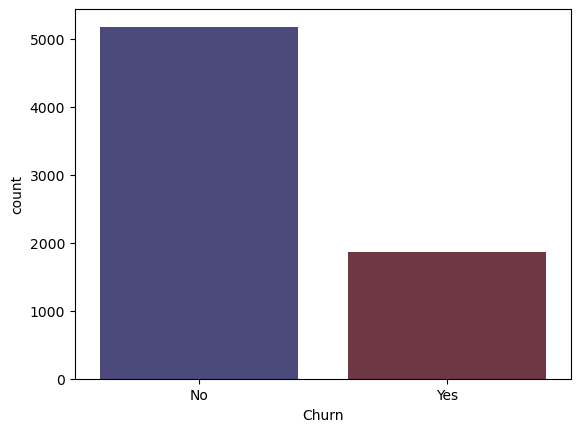

In [34]:
# Churn distribution by countplot

sns.countplot(data=df,x=df.Churn,palette='icefire')
plt.show()

The Count of churned customers is less accounting for 26.54%

In [36]:
#segregate variables

df_obj = []                                         # counter
df_num = []

for i in df:
    if df[i].dtype=="object":
        df_obj.append(i)
    else:
        df_num.append(i)
        
print(df_obj)
print(df_num)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn']
['Tenure', 'Monthly Charges', 'Total Charges']


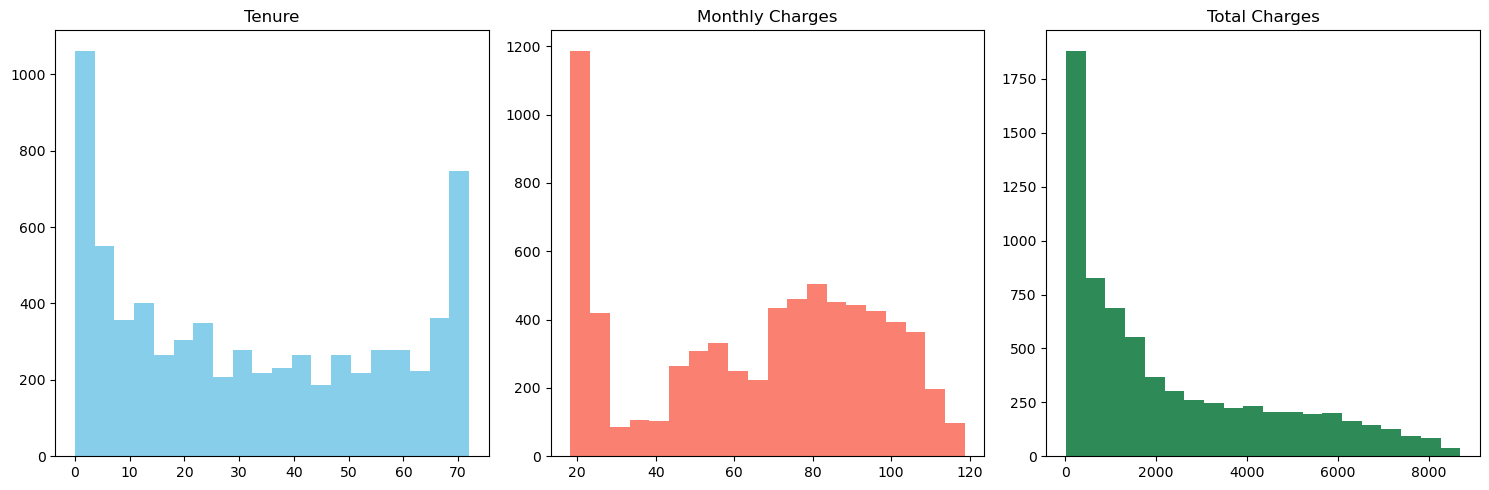

In [129]:
# checking the distribution of numerical variable

# Specify different colors for each histogram
colors = ['skyblue', 'salmon', 'seagreen']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col_name in enumerate(df_num):
    # Exclude NaN values using dropna() when plotting and add color
    axs[i].hist(df[col_name].dropna(), bins=20, color=colors[i])
    axs[i].set_title(col_name)

plt.tight_layout()
plt.show()

In [41]:
# check for skewness and kurtosis of each numerical variable.

for col in df_num:
    print(f"# {col}:")
    print("Skewness: %f" % df[col].skew())
    print("Kurtosis: %f" % df[col].kurt())
    print("--------------------")

# Tenure:
Skewness: 0.239540
Kurtosis: -1.387372
--------------------
# Monthly Charges:
Skewness: -0.220524
Kurtosis: -1.257260
--------------------
# Total Charges:
Skewness: 0.963789
Kurtosis: -0.226400
--------------------


It seems like the numerical variables do not follow a normal distribution. Also, Monthly and Total charges exhibit left and right skewness resp.

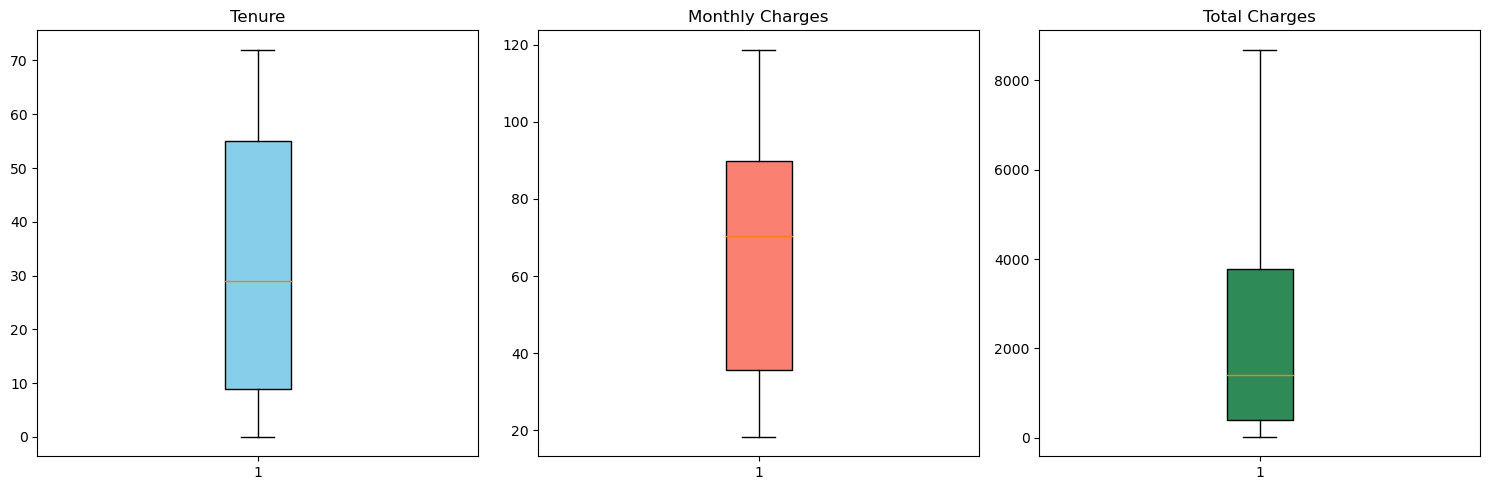

In [130]:
# boxplot for numerical variables

#Specify colors for each boxplot
colors = ['skyblue', 'salmon', 'seagreen']

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, col_name in enumerate(df_num):
    # Exclude NaN values using dropna() when plotting
    box = axs[i].boxplot(df[col_name].dropna(), patch_artist=True)  # Enable coloring
    axs[i].set_title(col_name)
    
    # Set properties for each box
    for patch, color in zip(box['boxes'], colors[i:i+1]):  # Use i:i+1 to get single color in a list
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

No outliers are present.

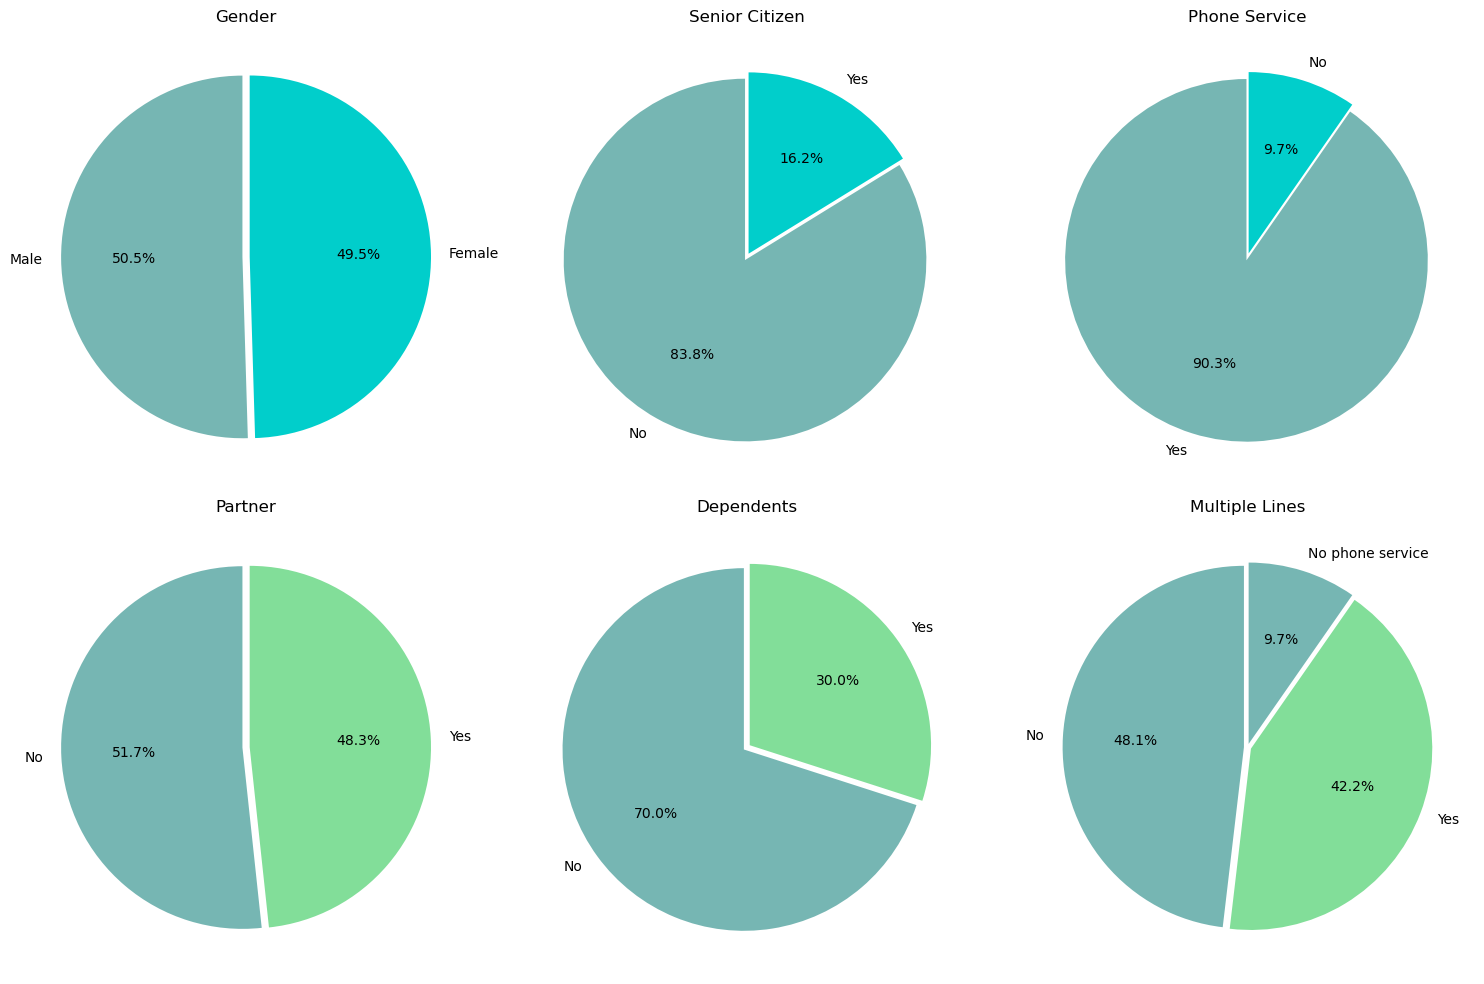

In [58]:
#percent distribtuon of categorical variables

pie_list = ['Gender', 'Senior Citizen', 'Phone Service', 'Partner', 'Dependents', 'Multiple Lines']

# Colors for the first and second rows
colors_row1 = ["#76B6B3", "#01CECB"]
colors_row2 = ["#76B6B3", "#82DE99"]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, col_name in enumerate(pie_list):
    counts = df[col_name].value_counts()

    # Adjust the explode effect for pie slices based on number of categories
    explode = tuple([0.02]*len(counts))  # Create an explode tuple with length equal to number of categories

    # Determine the row and column index for the current subplot
    row_idx = i // 3
    col_idx = i % 3
    
    # Select colors based on the row
    colors = colors_row1 if row_idx == 0 else colors_row2
    
    axs[row_idx, col_idx].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
    axs[row_idx, col_idx].set_title(col_name)

plt.tight_layout()
plt.show()

1. We can observe that the distribution between genders and the presence of a partner is almost equal, with males and those without partners slightly edging out the other categories.
2. Additionally, only 16% of the data includes senior citizens.
3. Furthermore, 90% of customers have availed themselves of phone service.
4. Approximately 70% of the customers do not have dependents.
5. Lastly, around half of the customers do not have multiple lines, and only 42% do.

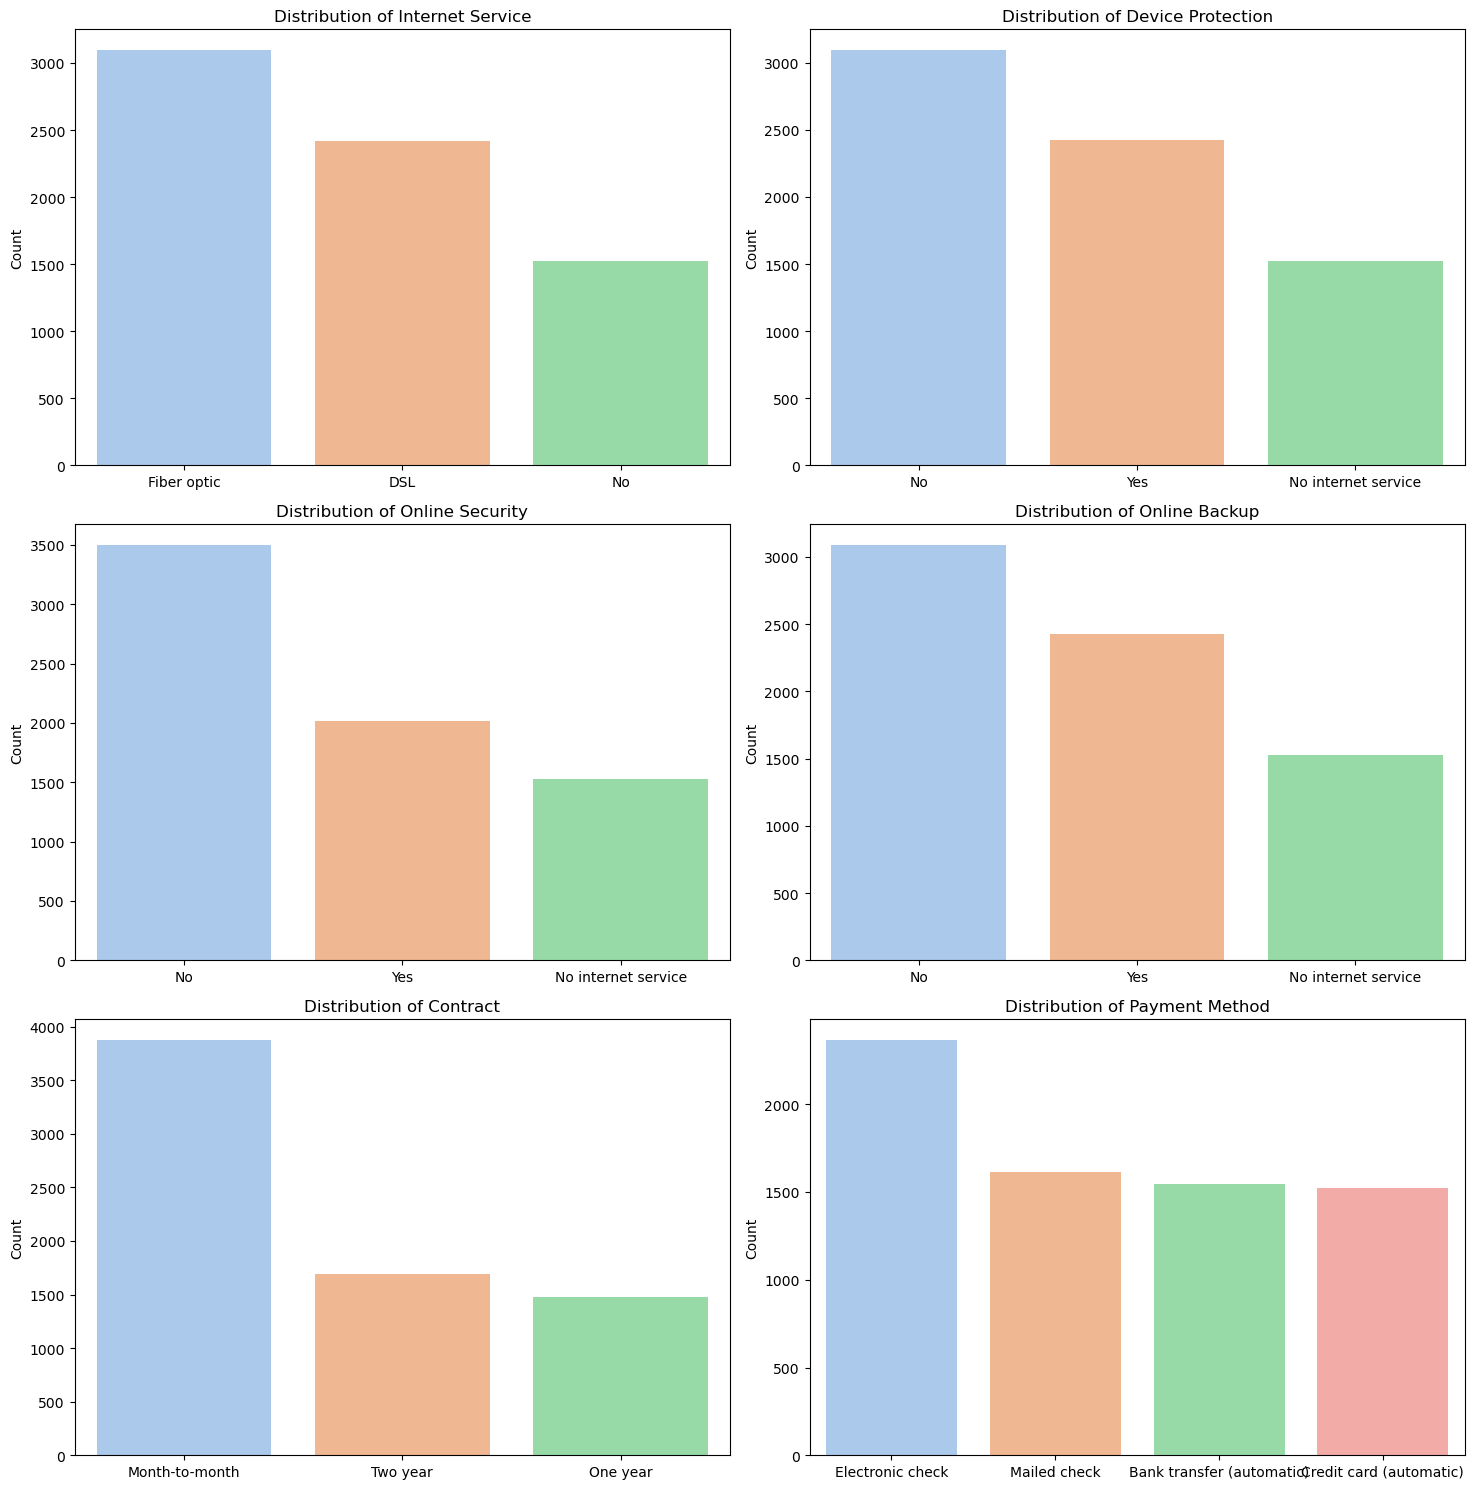

In [119]:
# bar plot for the categorical variables

cp_list = ['Internet Service', 'Device Protection', 'Online Security', 'Online Backup', 'Contract', 'Payment Method']

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

for i, feature in enumerate(cp_list):
    # Determine the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    # Prepare the data
    data = df[feature].value_counts().reset_index()
    data.columns = [feature, 'Count']
    
    
    # Create the bar plot
    sns.barplot(x=feature, y='Count', data=data, ax=axs[row_idx, col_idx], palette='pastel')
    axs[row_idx, col_idx].set_title(f'Distribution of {feature}')
    axs[row_idx, col_idx].set_xlabel('')
    axs[row_idx, col_idx].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

1. Most customers have chosen fiber optics, followed by DSL, for their service.
2. Most customers have chosen not to opt for device protection.
3. For online security and backup, most have again chosen not to opt in.
4. The month-to-month service contract is the most popular.
5. Lastly, customers primarily pay via electronic check.

Bivariate Analysis

In [123]:
# creating a defined function of distribtion plot

def dist_default(var_name, df):
    plt.figure(figsize=(10, 3))
    
    # Plot the distribution for target == 0 and target == 1 with specified colors
    sns.distplot(df.loc[df['Churn'] == 'No', var_name], label='Churn == No', color='lightgrey')  # Light color for 'No'
    sns.distplot(df.loc[df['Churn'] == 'Yes', var_name], label='Churn == Yes', color='seagreen')  # Dark color for 'Yes'
    
    # Label the plot
    plt.xlabel(var_name)
    # plt.ylabel('Density')  # Commented out as sns.distplot() already provides a y-label.
    plt.title('%s Distribution' % var_name)
    plt.legend()

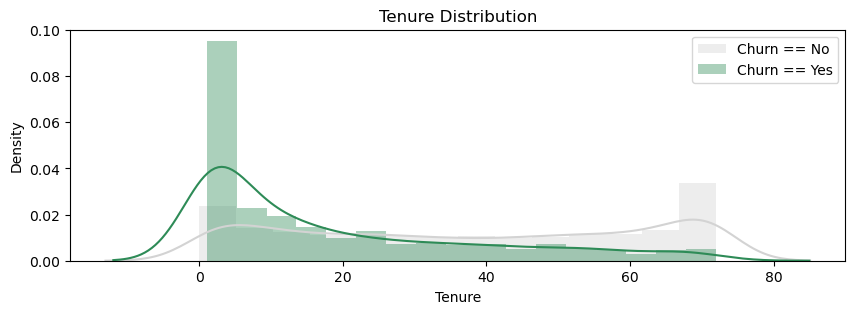

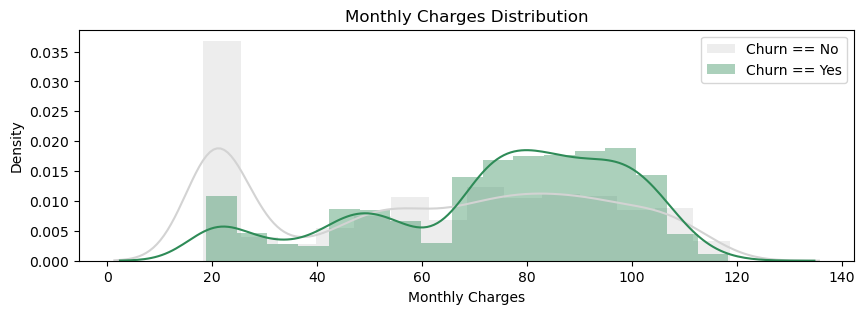

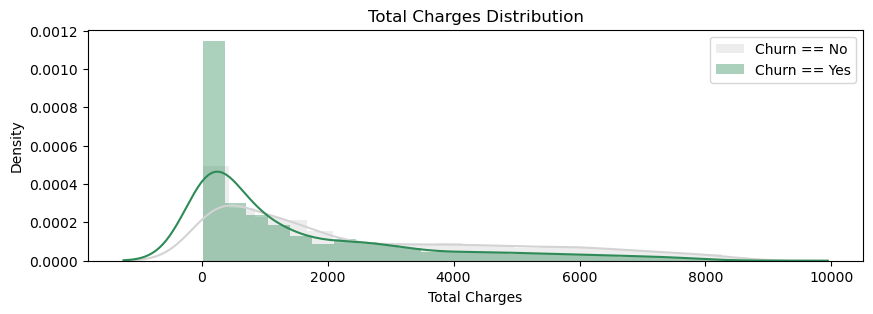

In [124]:
for i in df_num:
    dist_default(i,df)
    plt.show()

1. We can clearly infer that customers with low tenure, such as 1 to 5 months, tend to churn more frequently.
2. Customers facing monthly charges in the range of 70 to 110 are more likely to churn, whereas those with lower monthly charges tend to remain with the service.
3. For total charges, the likelihood of customers churning is higher with charges ranging from 0 to 500

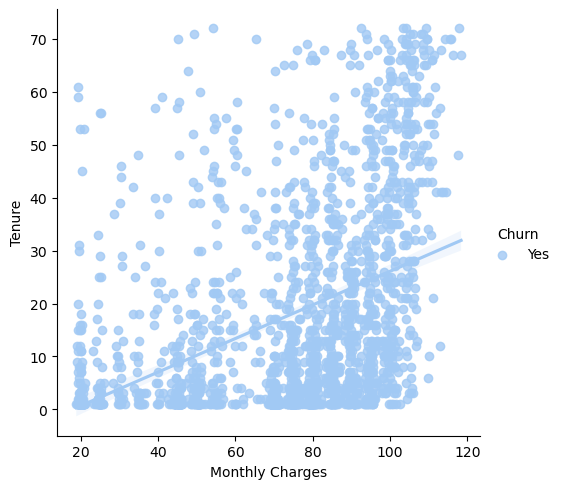

In [122]:
# Filter the DataFrame to include only rows where 'Churn' is 'Yes'
df_churn_yes = df[df['Churn'] == 'Yes']


sns.lmplot(data=df_churn_yes, x='Monthly Charges', y='Tenure', hue='Churn', palette='pastel')
plt.show();

As we can see that the most churned customers are concentrated at right bottom where the tenure is low but monthly charges are high

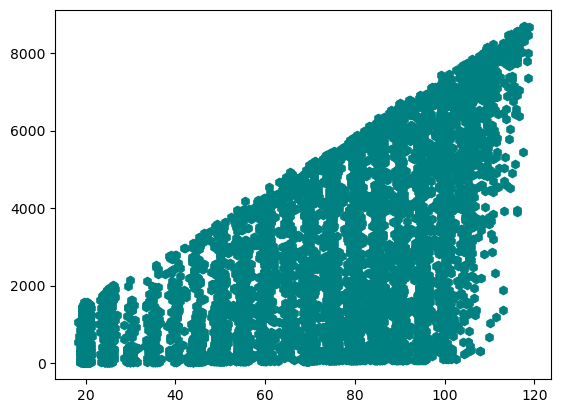

In [149]:
plt.scatter(data=df,x='Monthly Charges',y='Total Charges',c='teal',marker='h')

Higher the monthly chargers higher is the total charges, as expected.

In [90]:
#Make a function to plot categorical data according to target
import math

def count_default(df,categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)
    
    fig = plt.figure(figsize = (12, 5*number_of_rows))
    
    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows,number_of_columns,index)
        ax = sns.countplot(x = column, data = df, hue = target, palette="Blues")
        ax.set_title(column)
    return plt.show()

In [133]:
df_obj_demo = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
df_obj_acc = ['Contract', 'Paperless Billing', 'Payment Method']
df_obj_service = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

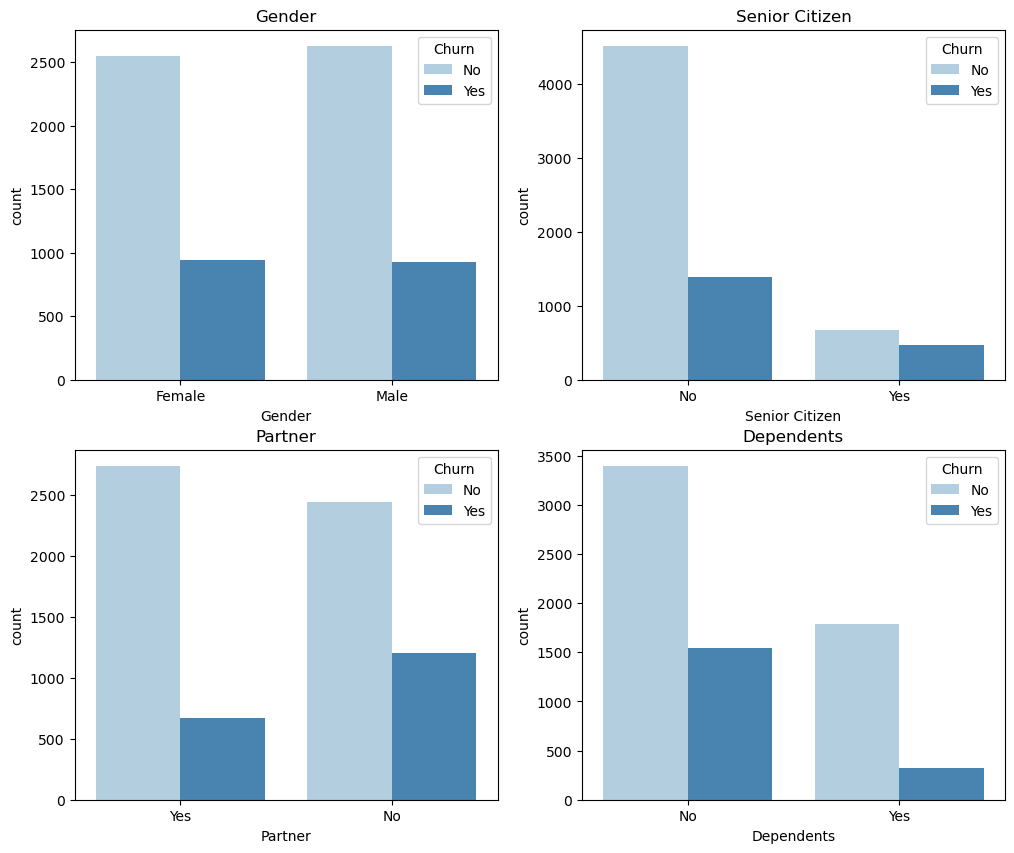

In [134]:
# distribution of customers with demographic info by churn

count_default(df,df_obj_demo,'Churn')

1. For Gender, we observe an equal distribution between churn and non-churn.
2. Although Senior Citizens make up a smaller portion of the customer base, they have a higher likelihood of churn compared to non-Senior Citizens.
3. Furthermore, customers without partners are more likely to churn.
4. Lastly, customers with dependents are less likely to churn compared to those without dependents.

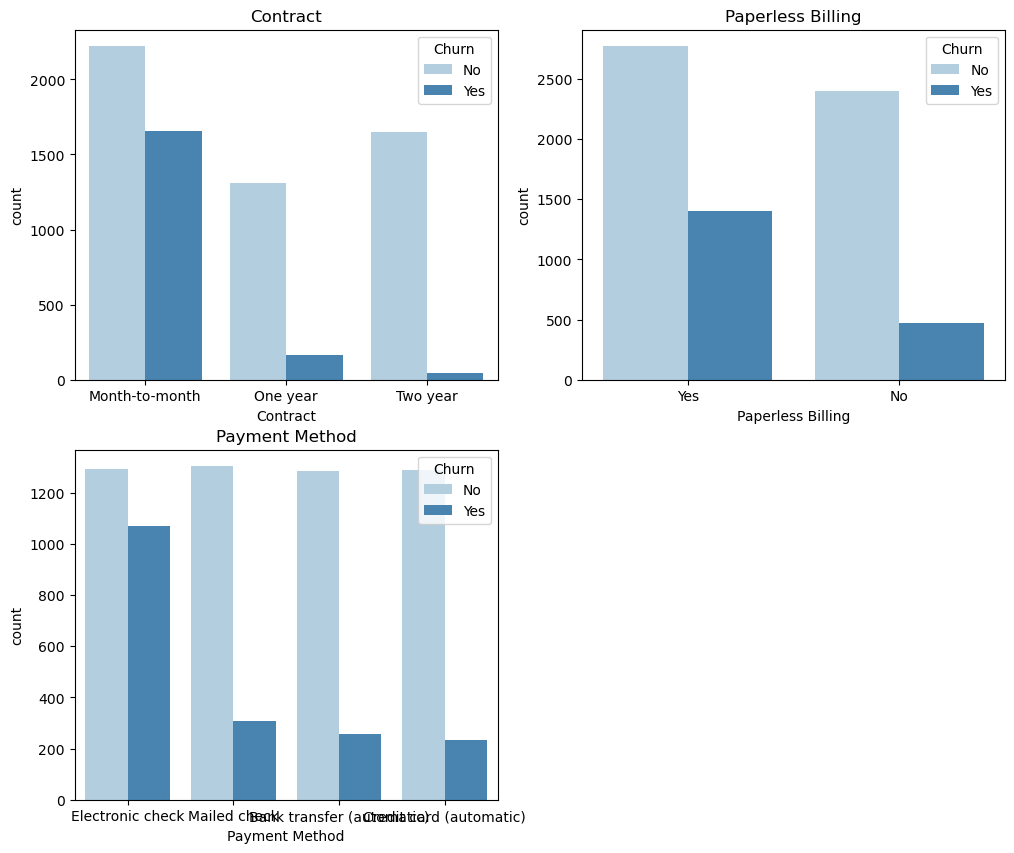

In [135]:
# distribution of customers with account_type info by churn

count_default(df,df_obj_acc,'Churn')

1. It appears that most customers prefer month-to-month contracts and pay via electronic check, yet these sub-categories also exhibit high churn rates, with nearly half of the customers churning.
2. Customers who opt for paperless billing experience higher churn rates.

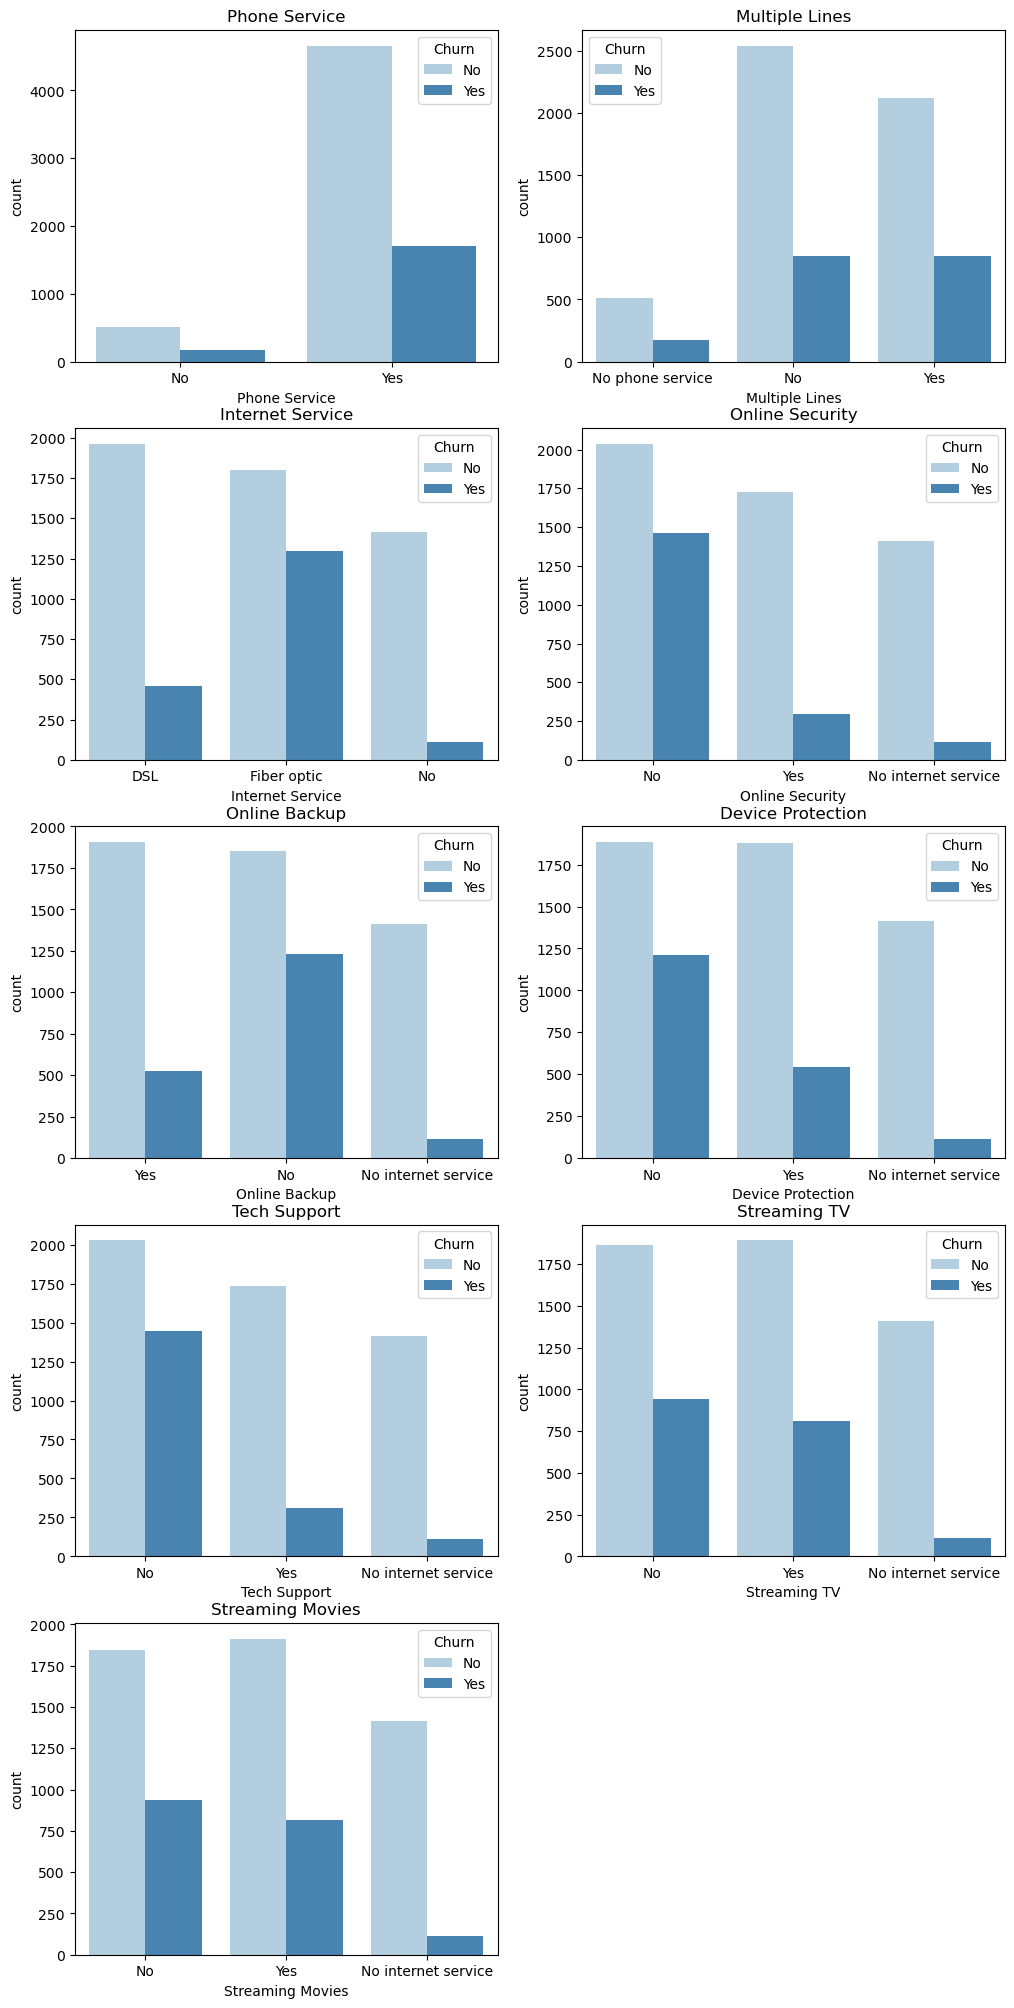

In [136]:
# distribution of customers with services info by churn

count_default(df,df_obj_service,'Churn')

1. Customers opting for phone services have a moderately high chance of churning.
2. Also, customers, whether opting for multiple lines or not, have an equal chance of being churned.
3. Customers with fiber optic internet service experience higher churn rates compared to others.
4. Furthermore, customers without online backup, online security, and device protection tend to discontinue the services more often.
5. Obviously, customers who lack tech support are more likely to churn.
6. Lastly, customers who are not streaming TV and movies have a slightly higher chance of churning.

Multi-variate analysis

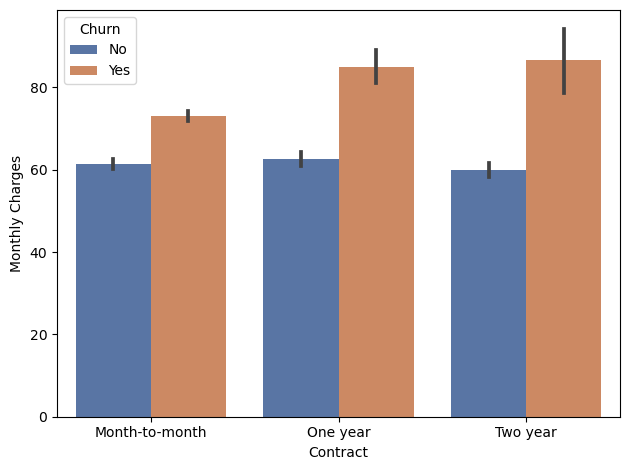

In [160]:
sns.barplot(data=df, x=df.Contract,y='Monthly Charges', hue=df.Churn, palette='deep')

plt.tight_layout()
plt.show();

Customers with high monthly charges tend to churn more across all contract types.

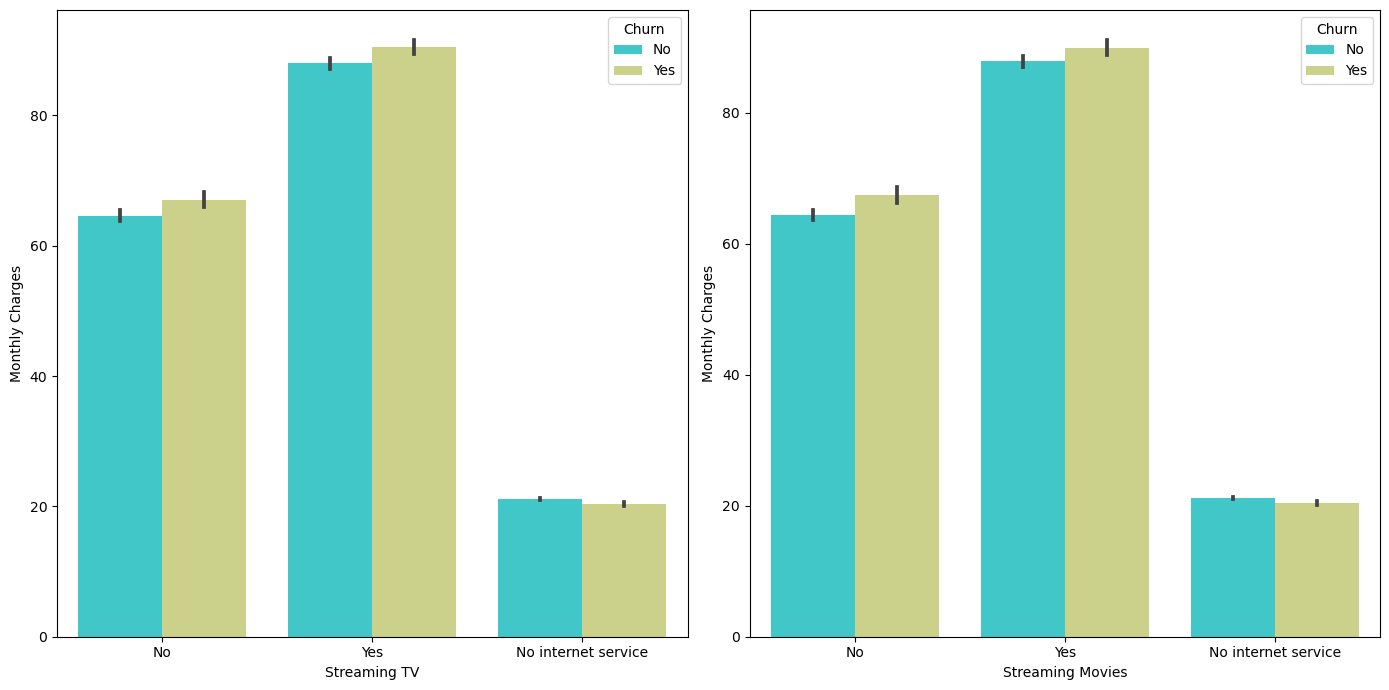

In [157]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(14,7)


g1=sns.barplot(data=df, x='Streaming TV', y='Monthly Charges', hue=df.Churn, palette='rainbow',ax=axes[0])

g1=sns.barplot(data=df, x='Streaming Movies',y='Monthly Charges', hue=df.Churn, palette='rainbow',ax=axes[1])


plt.tight_layout()
plt.show();

##### For checking the correlation, lets convert our categorical varaibles to numeric using label encoder.

In [165]:
le=LabelEncoder()                                   # using label encoder

for x in df_obj:
    df[x]=le.fit_transform(df[x])                   # fit and transform values by label encoder

    
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


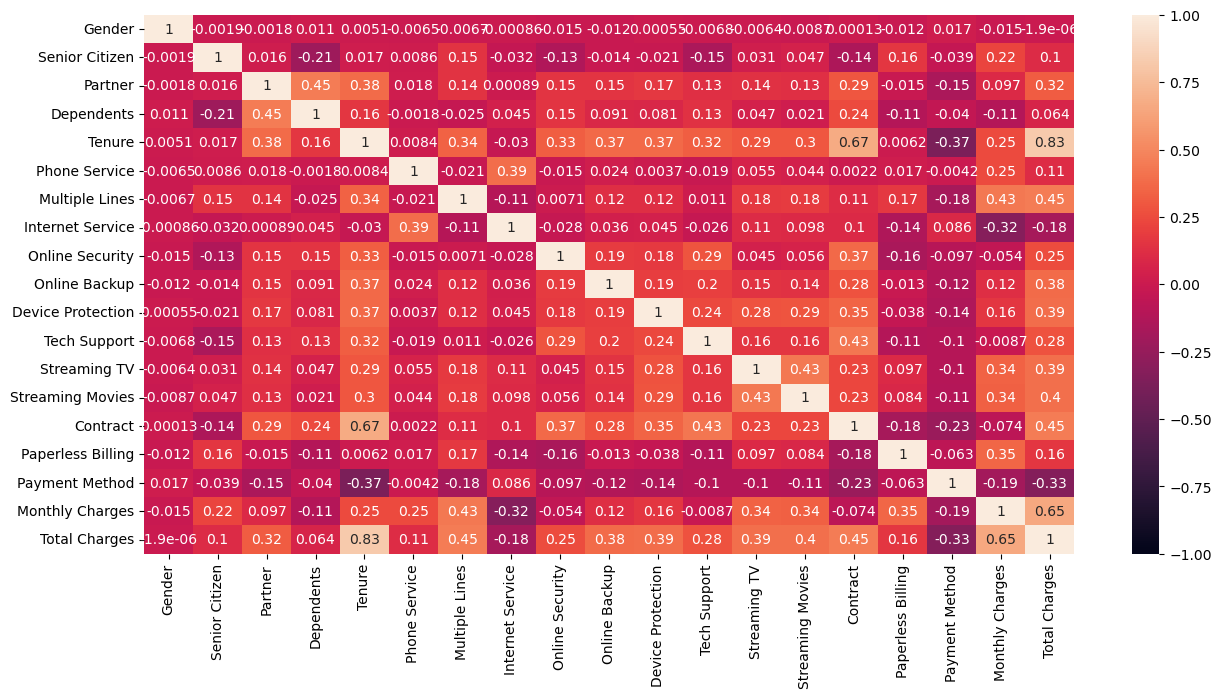

In [166]:
#Assumption of no multicolinearity: There should be no multicolinearity between the independent variables

df_ind = df.iloc[:,0:-1]                                # creating independent varibles   
corr_df = df_ind.corr(method='pearson')

plt.figure(figsize=(15,7))
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

There are no highly correlated variables, except for a few instances. For example, we observe a moderate correlation between 'Tenure' and 'Contract'. Additionally, 'Tenure' has a high correlation with 'Total Charges.

## Conclusion:

**Some Key Insights found**:-

* We can observe that customers with low tenure, such as 1 to 5 months, tend to churn more frequently.
* Customers facing monthly charges in the range of 70 to 110 are more likely to churn, whereas those with lower monthly charges tend to remain with the service.
* Although Senior Citizens make up a smaller portion of the customer base, they have a higher likelihood of churn compared to non-Senior Citizens.
* It appears that most customers prefer month-to-month contracts and pay via electronic check, yet these sub-categories also exhibit high churn rates, with nearly half of the customers churning.
* Customers without online backup, online security, and device protection tend to discontinue the services more often.
* Lastly, customers who lack tech support are more likely to churn.

#### Exporting the processed dataframe for further model development

If needed further feature selection and engineering would be done for modeling.

In [169]:
df.to_csv('new_custchurn.csv',index=False,header=True)

The End